### Import dependencies

In [1]:
import _pickle as cPickle, gzip, numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

### Loading the data

In [2]:
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f, encoding="latin1")
f.close()

In [3]:
print('The training dataset has', len(train_set), 'arrays.')
print('No. of images from train df =', len(train_set[0]), 'digits represented in images.')
print('Length of a pixel array = ', len(train_set[0][1]))
print('No. of labels from train df =', len(train_set[1]))
print('No. of images from validation df =', len(valid_set[0]))
print('No. of images from test df =', len(test_set[0]))

The training dataset has 2 arrays.
No. of images from train df = 50000 digits represented in images.
Length of a pixel array =  784
No. of labels from train df = 50000
No. of images from validation df = 10000
No. of images from test df = 10000


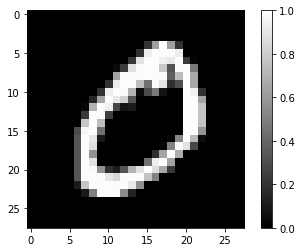

In [4]:
def get_image(array):
    image = [[] for k in range(28)]
    for k in range(28):
        for i in range(28):
            image[k].append(array[28*k + i])
    return image
    
plt.figure()
plt.imshow(get_image(train_set[0][1]), cmap=cm.gray, vmin=0, vmax=1)
plt.colorbar()
plt.show()

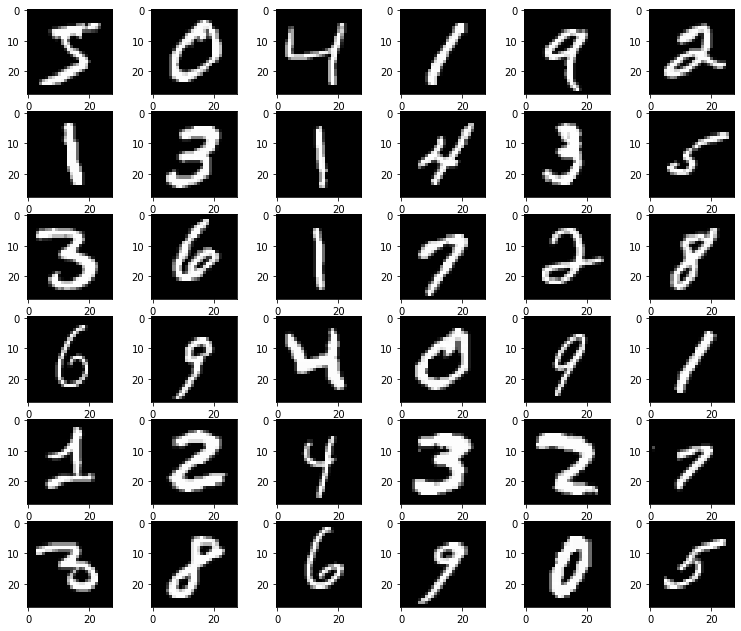

In [5]:
fig, axs = plt.subplots(6, 6)
fig.set_size_inches(13, 11)
k = 0
for i in range(6):
    for j in range(6):
        axs[i, j].imshow(get_image(train_set[0][k]), cmap=cm.gray, vmin=0, vmax=1)
        k += 1

In [6]:
def activation(z):
    if z > 0:
        return 1
    return 0

In [7]:
def get_classification_accuracy(w, b, df):
    correctly_classified = 0
    for i in range(len(df[0])):
        z = np.dot(w, df[0][i]) + b
        perceptron_index = np.argmax(z)
        if df[1][i] == perceptron_index:
            correctly_classified += 1
    accuracy = correctly_classified * 100 / len(df[0])
    return accuracy

In [8]:
def minibatch_training(no_iterations, learning_rate, batch_size, input_size, train_set):
    total_iter = no_iterations
    no_batches = len(train_set[0]) // batch_size    
    accuracy_results = []
    
    while no_iterations > 0:
#         print('=' * (total_iter - no_iterations + 1) + '>')

        w = np.random.normal(0, 1 / math.sqrt(input_size), (10, input_size))
        b = np.random.standard_normal(10)
        elem_in_batch = 0

        delta_weight_current_batch = np.zeros((10, input_size))
        delta_bias_current_batch = np.zeros(10)

        for i in range(len(train_set[0])):  
            x = np.array(train_set[0][i])
            label = train_set[1][i]
            elem_in_batch += 1
            t = np.array([1 if digit == label else 0 for digit in range(10)])
            z = np.dot(w, x) + b
            y = [activation(z_current) for z_current in z]

            delta_weight_current_batch += np.outer((t - y) * learning_rate, x)
            delta_bias_current_batch += (t - y) * learning_rate

            if elem_in_batch == batch_size:
                elem_in_batch = 0
                w += delta_weight_current_batch
                b += delta_bias_current_batch
                delta_weight_current_batch = np.zeros((10, input_size))
                delta_bias_current_batch = np.zeros(10)

        no_iterations -= 1
        accuracy_results.append(get_classification_accuracy(w, b, valid_set))
        
    return w, b, accuracy_results

In [9]:
w, b, accuracy_results = minibatch_training(no_iterations=100, learning_rate=0.001, batch_size=64, input_size=784, train_set=train_set)

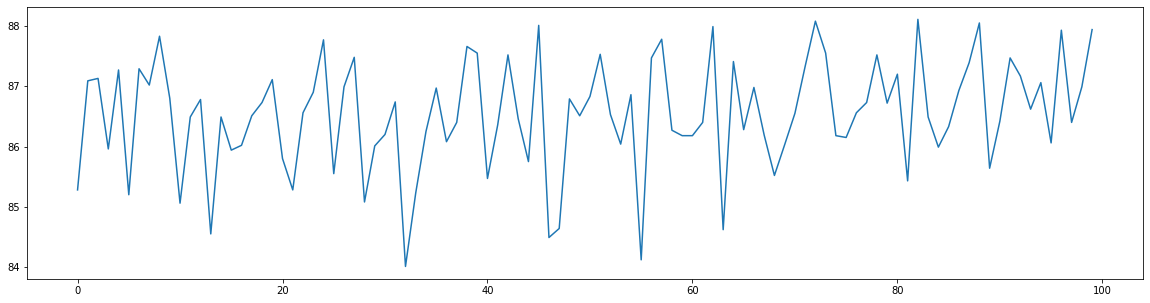

In [10]:
no_iterations=100
plt.figure(figsize=(20,5))
plt.plot([i for i in range(no_iterations)], accuracy_results)
plt.show()

### Validation stage

In [11]:
acc_val = get_classification_accuracy(w, b, valid_set)
acc_val

87.94

### Testing stage

In [12]:
acc_test = get_classification_accuracy(w, b, test_set)
acc_test

87.17